In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

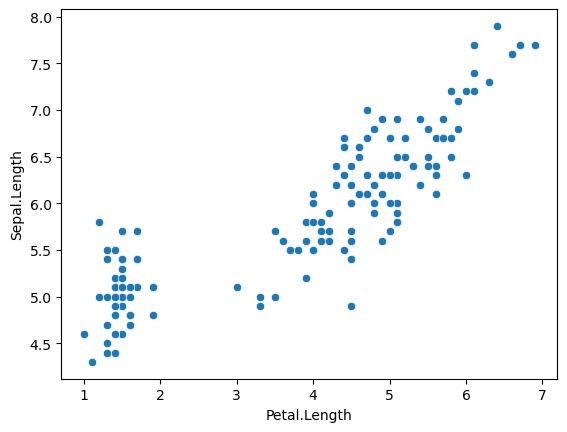

In [3]:
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length')

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [7]:
# Normalizando datos
X_std = StandardScaler().fit_transform(df.iloc[:, :-1])

# Gaussian Mixture

In [17]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
labels = gm.predict(X_std)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Text(0.5, 1.0, 'Método de Gaussian mixture')

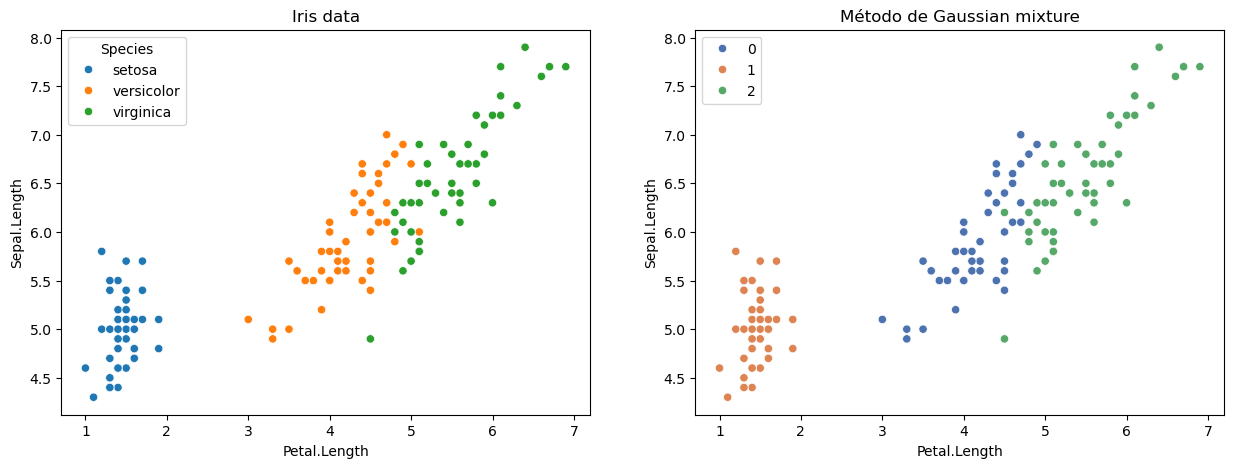

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='Species', ax=axes[0]).set_title('Iris data')

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=labels, palette='deep', ax=axes[1]).set_title('Método de Gaussian mixture')

In [28]:
df['modelo Gaussiano'] = labels

mapeo = {1: 'setosa', 2: 'virginica', 0: 'versicolor'}
df['modelo Gaussiano'] = df['modelo Gaussiano'] .map(mapeo)
df.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,modelo Gaussiano
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa


In [31]:
categorias = df.Species.unique()
matriz_conf = {}

for cateogiras_real in categorias:
    real = []
    for categorias_modelo in categorias:
        total = len(df[(df.Species == cateogiras_real) & (df['modelo Gaussiano'] == categorias_modelo)])
        real.append(total)
    matriz_conf[cateogiras_real] = real
matriz_conf

{'setosa': [50, 0, 0], 'versicolor': [0, 45, 5], 'virginica': [0, 0, 50]}

In [32]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

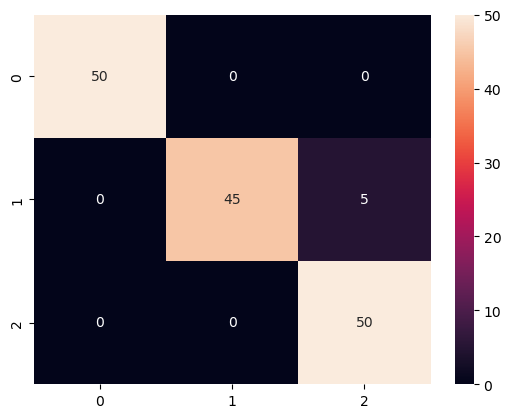

In [35]:
cm_gauss = confusion_matrix(df.Species, df['modelo Gaussiano'], labels=df.Species.unique())

sns.heatmap(cm_gauss, annot=True)